In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 80, 40
xmin, xmax = -3.0, 7.0
ymin, ymax = -2.5, 2.5

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'ibmf', 'delp']
face_vars     = ['velc', 'hvar']

ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']
imbound_vars  = ['ibmf', 'velc']

scalar_info   = dict(tmax = 10, 
                     dt = 0.01, 
                     Re = 100.0)

simulation_info = dict(time_stepping = 'ab2', 
                       poisson_solver = 'serial_direct', 
                       maxiter = 2000,
                       tol = 1e-10, with_ib = True)

particle_info = [dict(input='HDF5', file='sm_body.00001.h5', vel = [0.0,0.0])]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'outflow', 'neumann', 'neumann'])
bc_val_facex  = dict(velc = [1.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc =[0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(domain_data_struct, imbound_vars, simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
simulation.set_initial_velocity(gridc, gridx, gridy, 'velc', 'pres')

------------ Time = 0.01 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4361170335056223e-11
Total poisson time : 0.009289979934692383
Total INS time : 0.010699033737182617
Max, Min, U   : 1.390037367768297, 0.4023968342443422
Max, Min, V   : 0.4846874678238814, -0.4846874678238811
Max, Min, P   : 25.84414212654618, -23.198994651239165
Max, Min, DIV : 2.5757174171303632e-14, -1.637578961322106e-14
Qin, Qout     : 5.0, 5.0


------------ Time = 0.02 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.144732441928395e-12
Total poisson time : 0.008073806762695312
Total INS time : 0.01175379753112793
Max, Min, U   : 1.8002078829482275, -0.02140262597767685
Max, Min, V   : 1.0025102527770695, -1.002510252777069
Max, Min, P   : 29.574078545359264, -26.843610395654977
Max, Min, DIV : 1.8145207558717402e-15, -2.220446049250313e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 0.03 ---------------
Number of poisson iterations    

------------ Time = 0.34000000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6466380952088053e-13
Total poisson time : 0.00806879997253418
Total INS time : 0.011671066284179688
Max, Min, U   : 1.6436013290253666, -0.002827984330661644
Max, Min, V   : 1.1121341608512763, -1.1121341608512765
Max, Min, P   : -5.849123359852464, -8.045264564314154
Max, Min, DIV : 1.7763568394002505e-15, -1.7844883556938917e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 0.35000000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.273862448000398e-13
Total poisson time : 0.008185863494873047
Total INS time : 0.013385295867919922
Max, Min, U   : 1.6424188901241001, -0.0029272646467994813
Max, Min, V   : 1.1088531101512742, -1.1088531101512746
Max, Min, P   : -6.0118280420352095, -8.186102604242265
Max, Min, DIV : 1.7763568394002505e-15, -1.734723475976807e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 0.3600000000000

------------ Time = 0.5100000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.588207845836405e-13
Total poisson time : 0.007999181747436523
Total INS time : 0.012635946273803711
Max, Min, U   : 1.5752781719900335, -0.02741740084361867
Max, Min, V   : 1.0718661882554366, -1.0718661882554368
Max, Min, P   : -7.334450302639707, -9.440694978267407
Max, Min, DIV : 1.915514188238765e-15, -1.7832957333041577e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 0.5200000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.826910711322294e-13
Total poisson time : 0.009870052337646484
Total INS time : 0.019411087036132812
Max, Min, U   : 1.5708462917486108, -0.032411330250505084
Max, Min, V   : 1.0710439251756145, -1.0710439251756145
Max, Min, P   : -7.74322045267924, -9.844783434706745
Max, Min, DIV : 1.7763568394002505e-15, -1.9984014443252818e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 0.5300000000000002 --

------------ Time = 0.8300000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.250701636133957e-13
Total poisson time : 0.009172916412353516
Total INS time : 0.013676881790161133
Max, Min, U   : 1.5501608882434665, -0.14032867824438464
Max, Min, V   : 1.073945158808142, -1.0739451588081417
Max, Min, P   : -16.135135315381593, -18.127464615530453
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 0.8400000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.647186799021499e-13
Total poisson time : 0.021912813186645508
Total INS time : 0.029819011688232422
Max, Min, U   : 1.5508473751135265, -0.14240970097106917
Max, Min, V   : 1.073847877894323, -1.0738478778943228
Max, Min, P   : -16.327617147818092, -18.316635154808726
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 0.8500000000000005

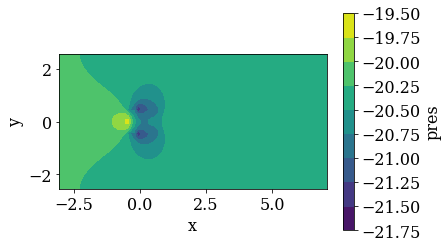

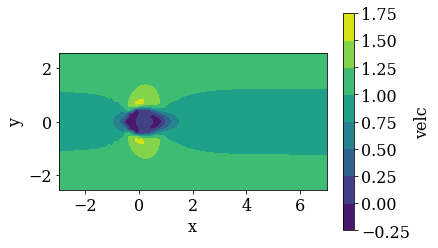

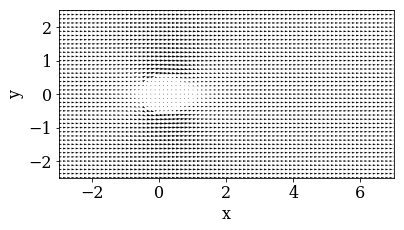

------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1320482618815543e-12
Total poisson time : 0.022382020950317383
Total INS time : 0.026446104049682617
Max, Min, U   : 1.5424051213615684, -0.1649001610145263
Max, Min, V   : 1.0688540358907643, -1.0688540358907637
Max, Min, P   : -19.148532633528042, -21.08969335413461
Max, Min, DIV : 1.817990202823694e-15, -2.1649348980190553e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1151178502863353e-12
Total poisson time : 0.012933969497680664
Total INS time : 0.019212007522583008
Max, Min, U   : 1.5404829809995957, -0.16551702508663446
Max, Min, V   : 1.0684798623562164, -1.0684798623562157
Max, Min, P   : -18.586921690096723, -20.5255742550016
Max, Min, DIV : 2.3592239273284576e-15, -1.8318679906315083e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.0300000000000007 

------------ Time = 1.2200000000000009 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.096506336855991e-13
Total poisson time : 0.012394905090332031
Total INS time : 0.0201261043548584
Max, Min, U   : 1.500408336392971, -0.20384600972678937
Max, Min, V   : 1.0621983720857855, -1.0621983720857853
Max, Min, P   : -17.210198196881695, -19.10376500775763
Max, Min, DIV : 1.7763568394002505e-15, -1.8596235662471372e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.2300000000000009 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.984087906838896e-13
Total poisson time : 0.012269020080566406
Total INS time : 0.01694202423095703
Max, Min, U   : 1.4994673759877817, -0.20805587875278048
Max, Min, V   : 1.0619580338528116, -1.0619580338528114
Max, Min, P   : -16.846638198383285, -18.73817897812082
Max, Min, DIV : 2.1094237467877974e-15, -1.7832957333041577e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.2400000000000009 ---

------------ Time = 1.450000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.068349326173115e-13
Total poisson time : 0.019953012466430664
Total INS time : 0.028769731521606445
Max, Min, U   : 1.4990298314182786, -0.279996631275036
Max, Min, V   : 1.057981001988427, -1.0579810019884266
Max, Min, P   : -17.663945939524893, -19.51678708170678
Max, Min, DIV : 1.7763568394002505e-15, -2.1094237467877974e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.460000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.396189361114281e-13
Total poisson time : 0.014338970184326172
Total INS time : 0.02441692352294922
Max, Min, U   : 1.4993244336849956, -0.28235469883313674
Max, Min, V   : 1.0578511117780582, -1.0578511117780578
Max, Min, P   : -17.21284552438843, -19.064199513993618
Max, Min, DIV : 1.7763568394002505e-15, -1.74946862552261e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.470000000000001 --------

------------ Time = 1.6400000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.839293893390273e-13
Total poisson time : 0.015220880508422852
Total INS time : 0.02334308624267578
Max, Min, U   : 1.4930075610385247, -0.3131030201646882
Max, Min, V   : 1.0561100998485966, -1.0561100998485966
Max, Min, P   : -19.443102535269787, -21.27038265865376
Max, Min, DIV : 1.8214596497756474e-15, -1.7832957333041577e-15
Qin, Qout     : 5.0, 4.999999999999999


------------ Time = 1.6500000000000012 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.958602042697883e-13
Total poisson time : 0.018517017364501953
Total INS time : 0.025219202041625977
Max, Min, U   : 1.4920988041181338, -0.3142328368347181
Max, Min, V   : 1.056040677640481, -1.056040677640481
Max, Min, P   : -19.733899406411595, -21.559953039317655
Max, Min, DIV : 1.887379141862766e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.6600000

------------ Time = 1.9400000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8122584483938614e-13
Total poisson time : 0.010602712631225586
Total INS time : 0.014878034591674805
Max, Min, U   : 1.4713871320354062, -0.362405695738666
Max, Min, V   : 1.0547813134236608, -1.0547813134236608
Max, Min, P   : -24.06330895910584, -25.859005607872817
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.9500000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.096564042685943e-13
Total poisson time : 0.011328935623168945
Total INS time : 0.01683521270751953
Max, Min, U   : 1.4711583780693571, -0.3636908735854856
Max, Min, V   : 1.054761299697048, -1.054761299697048
Max, Min, P   : -23.907709682630532, -25.70256520445461
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 1.9600000000000015 ----

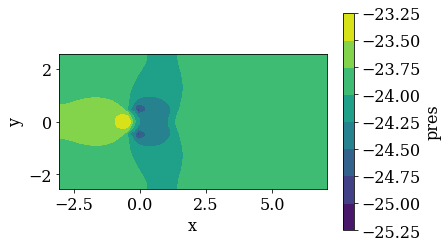

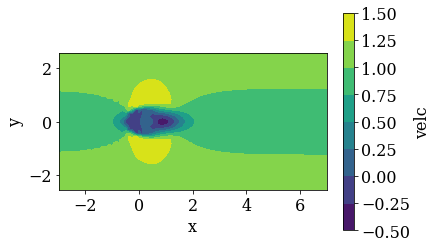

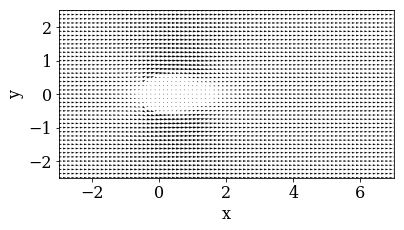

------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.28051323837606e-13
Total poisson time : 0.01990818977355957
Total INS time : 0.02256608009338379
Max, Min, U   : 1.4701921663960844, -0.37045229864175366
Max, Min, V   : 1.0546749859936715, -1.0546749859936717
Max, Min, P   : -23.020950603320887, -24.811023824217024
Max, Min, DIV : 1.7763568394002505e-15, -1.8041124150158794e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.920774641002671e-13
Total poisson time : 0.011392831802368164
Total INS time : 0.01634693145751953
Max, Min, U   : 1.4700756933594283, -0.371429887080504
Max, Min, V   : 1.054666147982379, -1.054666147982379
Max, Min, P   : -22.810946077359414, -24.600262892941238
Max, Min, DIV : 1.7763568394002505e-15, -1.8041124150158794e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.0300000000000007 -------

------------ Time = 2.259999999999996 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.583912836485764e-13
Total poisson time : 0.014514923095703125
Total INS time : 0.019294023513793945
Max, Min, U   : 1.4663783761935485, -0.384690608107719
Max, Min, V   : 1.0548028320150957, -1.0548028320150957
Max, Min, P   : -25.10019724247975, -26.873668856500345
Max, Min, DIV : 1.887379141862766e-15, -1.8665624601510444e-15
Qin, Qout     : 5.0, 5.000000000000001


------------ Time = 2.2699999999999956 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.191535126268591e-13
Total poisson time : 0.0136566162109375
Total INS time : 0.019556760787963867
Max, Min, U   : 1.4661466442189264, -0.38489569513818495
Max, Min, V   : 1.0548159517894957, -1.0548159517894957
Max, Min, P   : -24.6557332771624, -26.42861044458899
Max, Min, DIV : 1.887379141862766e-15, -1.8596235662471372e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.27999999999

------------ Time = 2.4999999999999907 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.017880576683425e-13
Total poisson time : 0.009865999221801758
Total INS time : 0.016399145126342773
Max, Min, U   : 1.4610743953762668, -0.4046099341623889
Max, Min, V   : 1.0549578280970726, -1.0549578280970724
Max, Min, P   : -26.49472464338939, -28.25493017503905
Max, Min, DIV : 1.7763568394002505e-15, -1.8596235662471372e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.5099999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.761911547583798e-13
Total poisson time : 0.014114141464233398
Total INS time : 0.024180889129638672
Max, Min, U   : 1.4608991669788265, -0.40516442589177715
Max, Min, V   : 1.0549509319358268, -1.0549509319358266
Max, Min, P   : -26.69074980191971, -28.450443775701427
Max, Min, DIV : 1.7763568394002505e-15, -1.915134717478395e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.5199999999999902 --

------------ Time = 2.719999999999986 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.349092618472016e-14
Total poisson time : 0.010635137557983398
Total INS time : 0.015446901321411133
Max, Min, U   : 1.4580382576184787, -0.4117979611417402
Max, Min, V   : 1.0544149185056866, -1.0544149185056868
Max, Min, P   : -29.11238926483065, -30.861788662516464
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.7299999999999858 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.511508301854986e-14
Total poisson time : 0.011034250259399414
Total INS time : 0.01813220977783203
Max, Min, U   : 1.457926629224983, -0.41191109564922657
Max, Min, V   : 1.0543692934984477, -1.0543692934984479
Max, Min, P   : -29.135971105578783, -30.884892148872957
Max, Min, DIV : 1.734723475976807e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.7399999999999856 ---

------------ Time = 2.9699999999999807 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.040277546017332e-13
Total poisson time : 0.014181137084960938
Total INS time : 0.019845962524414062
Max, Min, U   : 1.4551508743178894, -0.4159875142384347
Max, Min, V   : 1.0527614952634012, -1.0527614952634015
Max, Min, P   : -32.7538512671383, -34.49129966177898
Max, Min, DIV : 1.8318679906315083e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.9799999999999804 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1098820581064615e-13
Total poisson time : 0.014168024063110352
Total INS time : 0.020142078399658203
Max, Min, U   : 1.4550152813601174, -0.4163673077562204
Max, Min, V   : 1.052676473602032, -1.0526764736020322
Max, Min, P   : -32.978154301772975, -34.71512366360654
Max, Min, DIV : 1.887379141862766e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 2.9899999999999802 ----

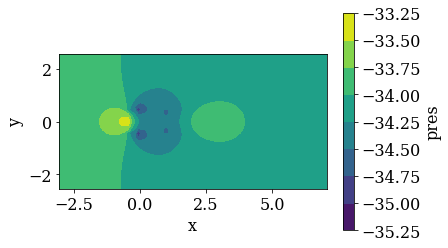

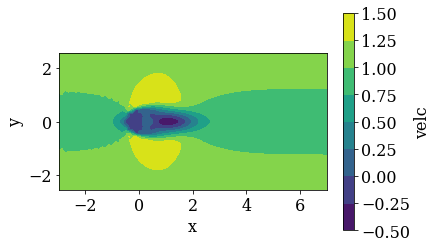

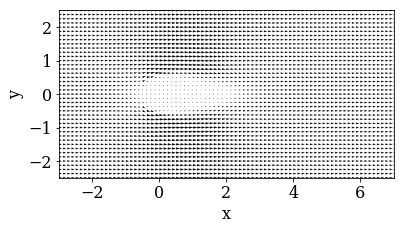

------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.5010700384192724e-13
Total poisson time : 0.02111506462097168
Total INS time : 0.02406787872314453
Max, Min, U   : 1.4545926678178773, -0.41740626016417237
Max, Min, V   : 1.052415088215096, -1.052415088215096
Max, Min, P   : -33.52192609653808, -35.25745875734162
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.027855271824709e-13
Total poisson time : 0.009808778762817383
Total INS time : 0.01694202423095703
Max, Min, U   : 1.4544463417973217, -0.4177200443551921
Max, Min, V   : 1.0523260183419274, -1.0523260183419274
Max, Min, P   : -33.674711026754615, -35.40976504200786
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 3.0299999999999794 -------

------------ Time = 3.279999999999974 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.4742462013205507e-14
Total poisson time : 0.009294986724853516
Total INS time : 0.012676715850830078
Max, Min, U   : 1.4497767410206532, -0.4210189646175604
Max, Min, V   : 1.0498511399785622, -1.0498511399785617
Max, Min, P   : -35.54021676730951, -37.263040284508236
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 3.289999999999974 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.900886287995882e-14
Total poisson time : 0.00854802131652832
Total INS time : 0.011891841888427734
Max, Min, U   : 1.4495746757594958, -0.42098525014250016
Max, Min, V   : 1.0497561669262896, -1.0497561669262891
Max, Min, P   : -35.593531509911635, -37.315899743725296
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 3.2999999999999736 -

------------ Time = 3.5799999999999677 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7606487965452996e-13
Total poisson time : 0.012607812881469727
Total INS time : 0.019489049911499023
Max, Min, U   : 1.4437987519179456, -0.4177230355490966
Max, Min, V   : 1.0473101643184277, -1.047310164318428
Max, Min, P   : -38.17463095400451, -39.88467347411116
Max, Min, DIV : 1.7763568394002505e-15, -1.8041124150158794e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 3.5899999999999674 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.550087759463086e-13
Total poisson time : 0.00834512710571289
Total INS time : 0.01276397705078125
Max, Min, U   : 1.4436118876892459, -0.4178439025525093
Max, Min, V   : 1.0472391709003668, -1.0472391709003668
Max, Min, P   : -38.3569045434805, -40.06655673199121
Max, Min, DIV : 1.817990202823694e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 3.5999999999999672 -------

------------ Time = 3.8599999999999617 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.757780855925049e-13
Total poisson time : 0.012902021408081055
Total INS time : 0.018291950225830078
Max, Min, U   : 1.439118908701526, -0.4175751245555518
Max, Min, V   : 1.0456472090421034, -1.0456472090421032
Max, Min, P   : -38.1820647976192, -39.88209928843127
Max, Min, DIV : 1.8457457784393227e-15, -1.9984014443252818e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 3.8699999999999615 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.702477435784372e-13
Total poisson time : 0.010615110397338867
Total INS time : 0.016078948974609375
Max, Min, U   : 1.4389754730194235, -0.4174514588706861
Max, Min, V   : 1.045598334862245, -1.045598334862245
Max, Min, P   : -38.5177267373212, -40.217437823157475
Max, Min, DIV : 1.9984014443252818e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 3.8799999999999613 --------

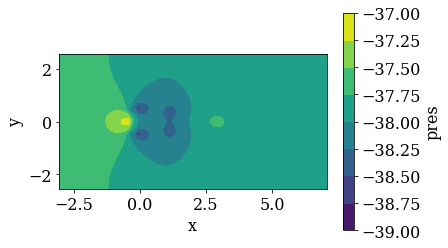

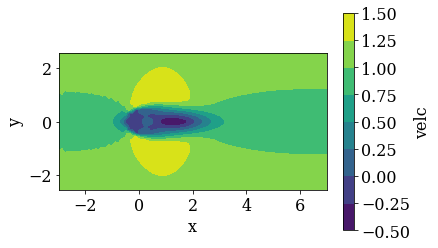

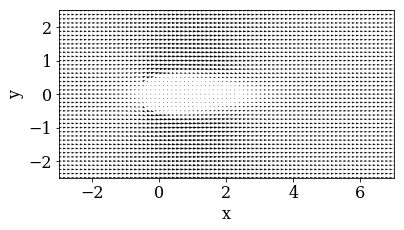

------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.113123448128072e-13
Total poisson time : 0.019243955612182617
Total INS time : 0.022877931594848633
Max, Min, U   : 1.437138802652823, -0.4150284061684566
Max, Min, V   : 1.0449652757478265, -1.0449652757478258
Max, Min, P   : -37.50035600141431, -39.195760884596396
Max, Min, DIV : 1.7763568394002505e-15, -2.1094237467877974e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.222300624343245e-13
Total poisson time : 0.012447118759155273
Total INS time : 0.018337011337280273
Max, Min, U   : 1.4370189138075529, -0.4148097662079024
Max, Min, V   : 1.0449231022293686, -1.0449231022293681
Max, Min, P   : -37.81697567430515, -39.512087945982614
Max, Min, DIV : 1.887379141862766e-15, -1.925543058334256e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 4.0299999999999585 ------

------------ Time = 4.249999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.094474571179767e-12
Total poisson time : 0.011413097381591797
Total INS time : 0.016788005828857422
Max, Min, U   : 1.4345523973083887, -0.40866254486733494
Max, Min, V   : 1.0440258656603516, -1.044025865660352
Max, Min, P   : -43.24392712633864, -44.932786383159375
Max, Min, DIV : 1.870031907102998e-15, -2.130240428499519e-15
Qin, Qout     : 5.0, 5.000000000000001


------------ Time = 4.259999999999954 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4092953004684636e-13
Total poisson time : 0.01001882553100586
Total INS time : 0.018655061721801758
Max, Min, U   : 1.4344540011303624, -0.4086144046405748
Max, Min, V   : 1.043989326878533, -1.0439893268785334
Max, Min, P   : -43.48421537157822, -45.172821599184445
Max, Min, DIV : 1.8318679906315083e-15, -1.8318679906315083e-15
Qin, Qout     : 5.0, 4.999999999999999


------------ Time

------------ Time = 4.489999999999949 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.612252814877038e-13
Total poisson time : 0.012774229049682617
Total INS time : 0.01763772964477539
Max, Min, U   : 1.4322792224831364, -0.4059030142842565
Max, Min, V   : 1.0431937817214423, -1.0431937817214423
Max, Min, P   : -42.681351718952186, -44.36451003420511
Max, Min, DIV : 1.8041124150158794e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 4.4999999999999485 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.838035201123029e-13
Total poisson time : 0.010635137557983398
Total INS time : 0.01563119888305664
Max, Min, U   : 1.432187465361575, -0.40572359561394866
Max, Min, V   : 1.0431611151060767, -1.0431611151060767
Max, Min, P   : -42.39172964755613, -44.074666285281936
Max, Min, DIV : 1.7763568394002505e-15, -1.942890293094024e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 4.509999999999948 -------

------------ Time = 4.749999999999943 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.960572032819679e-13
Total poisson time : 0.010740995407104492
Total INS time : 0.017219066619873047
Max, Min, U   : 1.4299864543731127, -0.3999484341304082
Max, Min, V   : 1.042396806369125, -1.042396806369125
Max, Min, P   : -37.965702663686095, -39.64347002820171
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 4.759999999999943 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.08959792217152e-13
Total poisson time : 0.011194229125976562
Total INS time : 0.020199298858642578
Max, Min, U   : 1.429903298814197, -0.3996728223536085
Max, Min, V   : 1.0423682746561267, -1.0423682746561265
Max, Min, P   : -37.807089855597695, -39.48466461343567
Max, Min, DIV : 1.9984014443252818e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 4.769999999999943 --------

------------ Time = 4.999999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9001099049029235e-13
Total poisson time : 0.01557779312133789
Total INS time : 0.02062201499938965
Max, Min, U   : 1.428053840342511, -0.3926506400335352
Max, Min, V   : 1.0417250667870777, -1.0417250667870777
Max, Min, P   : -33.70988112903158, -35.38312784620977
Max, Min, DIV : 1.7312540290248535e-15, -1.6896206656014101e-15
Qin, Qout     : 5.0, 5.0




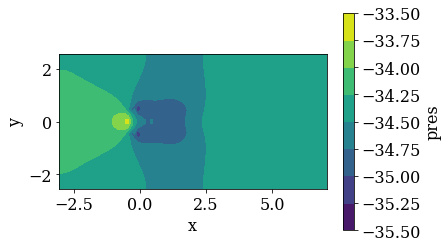

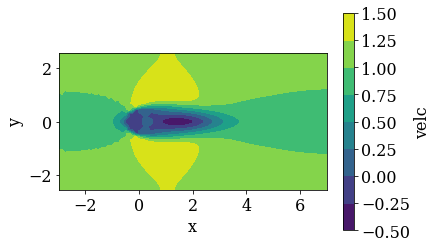

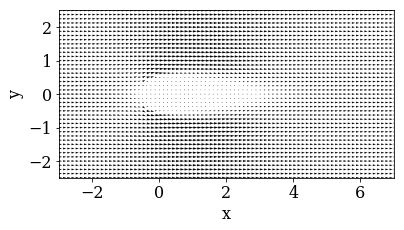

------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2711239907635826e-13
Total poisson time : 0.02212691307067871
Total INS time : 0.026162147521972656
Max, Min, U   : 1.4279828612187602, -0.39250858485105344
Max, Min, V   : 1.0416998456755708, -1.0416998456755708
Max, Min, P   : -33.54389483755734, -35.21697277770047
Max, Min, DIV : 1.734723475976807e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.20193664312839e-13
Total poisson time : 0.010211706161499023
Total INS time : 0.0169069766998291
Max, Min, U   : 1.4279123368458626, -0.39236290024104914
Max, Min, V   : 1.0416747391900822, -1.0416747391900822
Max, Min, P   : -33.3867862521583, -35.05969628390911
Max, Min, DIV : 1.9984014443252818e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.029999999999937 ---------

------------ Time = 5.239999999999933 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9159904877678546e-13
Total poisson time : 0.013018131256103516
Total INS time : 0.017879962921142578
Max, Min, U   : 1.4264619844035082, -0.38832876237095104
Max, Min, V   : 1.0411492967437728, -1.041149296743773
Max, Min, P   : -29.665771498092262, -31.335195567787117
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.2499999999999325 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.048935297132037e-13
Total poisson time : 0.01328420639038086
Total INS time : 0.01872992515563965
Max, Min, U   : 1.4264000335226588, -0.3881114492261883
Max, Min, V   : 1.0411265594109143, -1.0411265594109145
Max, Min, P   : -29.512624127211403, -31.181898712186506
Max, Min, DIV : 1.6653345369377348e-15, -1.6930901125533637e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.259999999999932 --

------------ Time = 5.469999999999928 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4524216840771125e-13
Total poisson time : 0.012704849243164062
Total INS time : 0.02100825309753418
Max, Min, U   : 1.4251056049148105, -0.3827173621452793
Max, Min, V   : 1.0406496468825015, -1.040649646882501
Max, Min, P   : -26.315419161635706, -27.981585792112387
Max, Min, DIV : 1.7763568394002505e-15, -1.8041124150158794e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.479999999999928 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1890663739747313e-13
Total poisson time : 0.01183938980102539
Total INS time : 0.018856048583984375
Max, Min, U   : 1.4250496395122538, -0.3824471014003296
Max, Min, V   : 1.0406290026431968, -1.0406290026431964
Max, Min, P   : -26.090286105030014, -27.756319346975786
Max, Min, DIV : 1.7763568394002505e-15, -1.9012569296705806e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.489999999999927 ---

------------ Time = 5.699999999999923 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.175317869619984e-13
Total poisson time : 0.014397144317626953
Total INS time : 0.019213199615478516
Max, Min, U   : 1.423878157266336, -0.37605060379890237
Max, Min, V   : 1.0401967607080715, -1.0401967607080709
Max, Min, P   : -21.604149557783778, -23.267409513677084
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.709999999999923 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2869900354670364e-13
Total poisson time : 0.011152982711791992
Total INS time : 0.018543243408203125
Max, Min, U   : 1.4238276226270292, -0.3757415113554952
Max, Min, V   : 1.0401780907149771, -1.0401780907149765
Max, Min, P   : -21.3691243224737, -23.032265275679535
Max, Min, DIV : 1.7763568394002505e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.7199999999999225 ---

------------ Time = 5.909999999999918 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.6779918314609283e-13
Total poisson time : 0.013679742813110352
Total INS time : 0.02024221420288086
Max, Min, U   : 1.4228662207884377, -0.37126078494634945
Max, Min, V   : 1.0398218221619295, -1.0398218221619295
Max, Min, P   : -18.175907836551392, -19.83678893353965
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.919999999999918 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.967223141902637e-15
Total poisson time : 0.011120080947875977
Total INS time : 0.016520977020263672
Max, Min, U   : 1.4228205755183625, -0.3710534048408557
Max, Min, V   : 1.0398048457761364, -1.0398048457761364
Max, Min, P   : -18.170763821711322, -19.831537723475773
Max, Min, DIV : 1.7763568394002505e-15, -1.6653345369377348e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 5.929999999999918 --

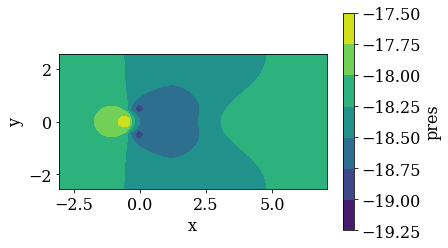

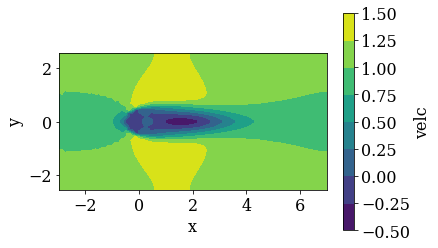

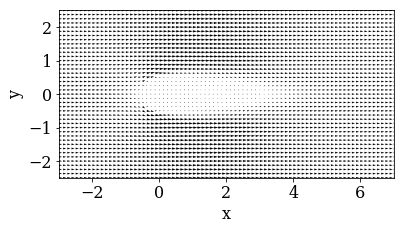

------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.052068777793856e-13
Total poisson time : 0.025341033935546875
Total INS time : 0.029952049255371094
Max, Min, U   : 1.4224197647649333, -0.3690981362984618
Max, Min, V   : 1.0396555321274035, -1.0396555321274035
Max, Min, P   : -17.45305920412976, -19.112892001665962
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4781124412298168e-13
Total poisson time : 0.010937929153442383
Total INS time : 0.018444061279296875
Max, Min, U   : 1.422376319684252, -0.36887141507194804
Max, Min, V   : 1.039639323189679, -1.039639323189679
Max, Min, P   : -17.382034296935547, -19.04176510890029
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 6.029999999999916 -----

------------ Time = 6.259999999999911 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.702548039046505e-13
Total poisson time : 0.014352798461914062
Total INS time : 0.018208980560302734
Max, Min, U   : 1.4213948372321215, -0.36293078315416316
Max, Min, V   : 1.0392723814310763, -1.0392723814310763
Max, Min, P   : -15.21359709141649, -16.87102698525395
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 6.269999999999911 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4622545158733277e-13
Total poisson time : 0.010138273239135742
Total INS time : 0.01409006118774414
Max, Min, U   : 1.4213563685867672, -0.3626644733661145
Max, Min, V   : 1.0392579860618991, -1.0392579860618991
Max, Min, P   : -15.035911870087078, -16.693251760595512
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 6.2799999999999105 --

------------ Time = 6.529999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.19279178984039e-13
Total poisson time : 0.010437965393066406
Total INS time : 0.014089107513427734
Max, Min, U   : 1.420419124073465, -0.35531258748690914
Max, Min, V   : 1.0389073164229146, -1.038907316422915
Max, Min, P   : -7.147923203116951, -8.803075181256574
Max, Min, DIV : 1.9984014443252818e-15, -1.970645868709653e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 6.539999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.865763381396392e-13
Total poisson time : 0.01249384880065918
Total INS time : 0.020276784896850586
Max, Min, U   : 1.4203854133333929, -0.35501526242844617
Max, Min, V   : 1.0388947035837852, -1.0388947035837857
Max, Min, P   : -6.793658450730786, -8.448731879567093
Max, Min, DIV : 1.9984014443252818e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 6.549999999999905 ----------

------------ Time = 6.819999999999899 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6925878154767555e-13
Total poisson time : 0.00896310806274414
Total INS time : 0.014025211334228516
Max, Min, U   : 1.419506912163271, -0.34854943291385876
Max, Min, V   : 1.0385657816057543, -1.0385657816057547
Max, Min, P   : -0.5687746946235497, -2.221802969164539
Max, Min, DIV : 1.6792123247455493e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 6.829999999999899 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.3446190036366804e-13
Total poisson time : 0.007934331893920898
Total INS time : 0.011781930923461914
Max, Min, U   : 1.419477767189553, -0.34831764849470737
Max, Min, V   : 1.0385548604115784, -1.0385548604115786
Max, Min, P   : -0.3292132012432638, -1.9821736784716033
Max, Min, DIV : 1.817990202823694e-15, -1.8041124150158794e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 6.839999999999899 ---

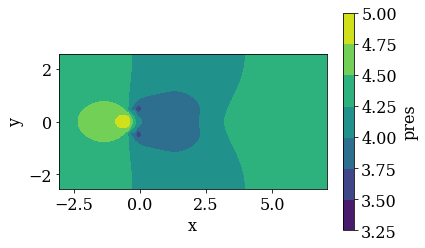

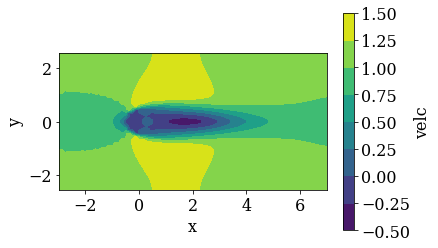

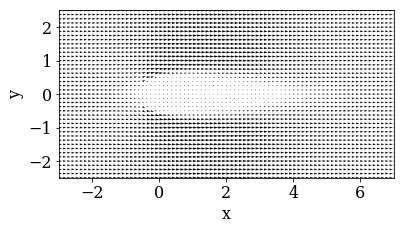

------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.259353867920147e-13
Total poisson time : 0.016558170318603516
Total INS time : 0.018666982650756836
Max, Min, U   : 1.418977399433256, -0.3439408103393108
Max, Min, V   : 1.0383673298398446, -1.038367329839845
Max, Min, P   : 5.297615866141812, 3.645818527707797
Max, Min, DIV : 1.8596235662471372e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.731051084556889e-13
Total poisson time : 0.011650800704956055
Total INS time : 0.01831197738647461
Max, Min, U   : 1.4189509001081415, -0.3436871515759606
Max, Min, V   : 1.038357399089192, -1.0383573990891923
Max, Min, P   : 4.809121735001942, 3.157385939857712
Max, Min, DIV : 1.942890293094024e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 4.999999999999999


------------ Time = 7.0299999999998946 -

------------ Time = 7.279999999999889 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.845073938197273e-13
Total poisson time : 0.010061025619506836
Total INS time : 0.016373872756958008
Max, Min, U   : 1.4183063139567578, -0.3367716174425275
Max, Min, V   : 1.0381160130439442, -1.0381160130439446
Max, Min, P   : 10.760910818080426, 9.110669573080392
Max, Min, DIV : 1.7763568394002505e-15, -1.880440247958859e-15
Qin, Qout     : 5.0, 5.000000000000001


------------ Time = 7.289999999999889 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.449459566931222e-13
Total poisson time : 0.010623931884765625
Total INS time : 0.014497041702270508
Max, Min, U   : 1.4182831548264814, -0.3364948175934024
Max, Min, V   : 1.038107347751922, -1.0381073477519225
Max, Min, P   : 11.088281595446697, 9.438093954417418
Max, Min, DIV : 1.9984014443252818e-15, -1.8318679906315083e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 7.299999999999

------------ Time = 7.569999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.672747909010946e-13
Total poisson time : 0.014912128448486328
Total INS time : 0.016866207122802734
Max, Min, U   : 1.4176799926551014, -0.32911698407764334
Max, Min, V   : 1.0378817148539463, -1.0378817148539463
Max, Min, P   : 10.36368004711252, 8.714886745077976
Max, Min, DIV : 1.887379141862766e-15, -2.1094237467877974e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 7.579999999999883 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.077462981400642e-13
Total poisson time : 0.009029150009155273
Total INS time : 0.012066125869750977
Max, Min, U   : 1.4176600004367392, -0.3288929145427093
Max, Min, V   : 1.037874232951756, -1.037874232951756
Max, Min, P   : 10.670151601132545, 9.021404475367893
Max, Min, DIV : 1.7763568394002505e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 7.589999999999883 ------------

Total poisson time : 0.011832237243652344
Total INS time : 0.0232541561126709
Max, Min, U   : 1.4172097042936853, -0.3232548270206984
Max, Min, V   : 1.0377055399785189, -1.0377055399785187
Max, Min, P   : 11.51540532260452, 9.867697856495433
Max, Min, DIV : 1.9984014443252818e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 7.8299999999998775 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.971245382062193e-13
Total poisson time : 0.009883880615234375
Total INS time : 0.014454841613769531
Max, Min, U   : 1.4171921186445815, -0.32301022488350656
Max, Min, V   : 1.0376989443402724, -1.0376989443402722
Max, Min, P   : 11.220270194131508, 9.572603311943448
Max, Min, DIV : 1.7763568394002505e-15, -2.0816681711721685e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 7.839999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.047232061361415e-13
Total poisson time : 0.007838249206542969
Total 

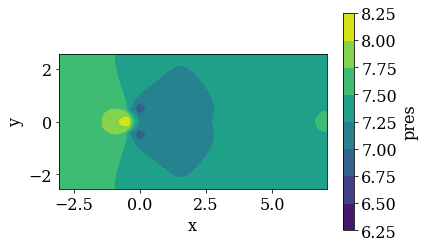

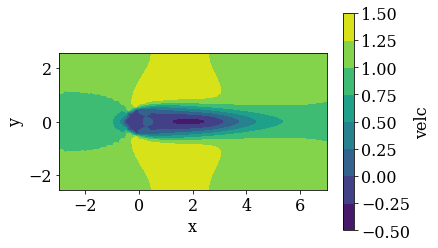

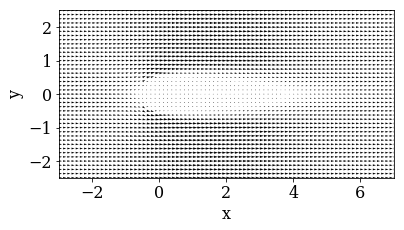

------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.8461006611285723e-13
Total poisson time : 0.017878055572509766
Total INS time : 0.019552946090698242
Max, Min, U   : 1.4168904907186741, -0.31849977924146966
Max, Min, V   : 1.037585737663193, -1.0375857376631927
Max, Min, P   : 7.944939759107023, 6.297968574518354
Max, Min, DIV : 1.8318679906315083e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 8.019999999999873 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0739296857816907e-12
Total poisson time : 0.008903026580810547
Total INS time : 0.014458894729614258
Max, Min, U   : 1.416874533125175, -0.31824382270383006
Max, Min, V   : 1.0375797450165911, -1.037579745016591
Max, Min, P   : 8.484986165167708, 6.838051759781481
Max, Min, DIV : 2.0539125955565396e-15, -1.9984014443252818e-15
Qin, Qout     : 5.0, 5.000000000000001


------------ Time = 8.02999999999

------------ Time = 8.329999999999867 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.5988893943623118e-13
Total poisson time : 0.010835886001586914
Total INS time : 0.01473093032836914
Max, Min, U   : 1.4164181822707724, -0.31010137789092207
Max, Min, V   : 1.037408286897407, -1.0374082868974068
Max, Min, P   : 5.353714413454825, 3.707830218545897
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 8.339999999999867 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.72375197752835e-13
Total poisson time : 0.008347749710083008
Total INS time : 0.012327909469604492
Max, Min, U   : 1.4164046332985887, -0.3098334522108619
Max, Min, V   : 1.037403194454887, -1.037403194454887
Max, Min, P   : 5.44391190116325, 3.7980588363058754
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 8.349999999999866 -------------

Total INS time : 0.013895034790039062
Max, Min, U   : 1.4160290748477287, -0.3023148270593513
Max, Min, V   : 1.0372619731292199, -1.0372619731292196
Max, Min, P   : 7.051939080622994, 5.406947845863301
Max, Min, DIV : 1.8318679906315083e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 8.64999999999986 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1901015391411754e-13
Total poisson time : 0.009042024612426758
Total INS time : 0.01462864875793457
Max, Min, U   : 1.4160175362166174, -0.30208275897493997
Max, Min, V   : 1.0372576315223438, -1.0372576315223436
Max, Min, P   : 7.171461334698527, 5.5264965498902425
Max, Min, DIV : 1.7763568394002505e-15, -1.781561009828181e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 8.65999999999986 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2065164721370687e-13
Total poisson time : 0.009847879409790039
Total INS time : 0.014306068420410156
Max, Min, 

------------ Time = 8.959999999999853 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.658264255139354e-13
Total poisson time : 0.011416196823120117
Total INS time : 0.014998912811279297
Max, Min, U   : 1.4156881894110276, -0.29471721695300834
Max, Min, V   : 1.037133623196997, -1.0371336231969968
Max, Min, P   : 12.805744677478245, 11.16153418682249
Max, Min, DIV : 1.7763568394002505e-15, -1.7577085620334998e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 8.969999999999853 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.901463265846222e-13
Total poisson time : 0.00796198844909668
Total INS time : 0.011442184448242188
Max, Min, U   : 1.4156784302659438, -0.29447535466967056
Max, Min, V   : 1.0371299462440888, -1.0371299462440886
Max, Min, P   : 13.014764618368526, 11.3705764580567
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 8.979999999999853 ---------

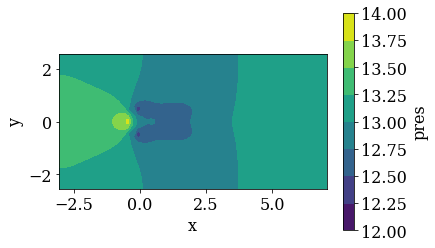

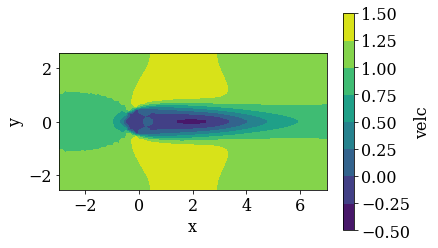

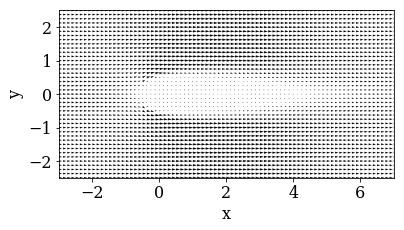

------------ Time = 9.009999999999852 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4590305478497135e-13
Total poisson time : 0.015897035598754883
Total INS time : 0.017786741256713867
Max, Min, U   : 1.4156399015889716, -0.2935060586433476
Max, Min, V   : 1.0371154287051068, -1.0371154287051065
Max, Min, P   : 14.028949748146879, 12.384849734218491
Max, Min, DIV : 1.7763568394002505e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 9.019999999999852 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.726769358182569e-13
Total poisson time : 0.008265972137451172
Total INS time : 0.013360023498535156
Max, Min, U   : 1.4156303950887086, -0.29326330517263954
Max, Min, V   : 1.0371118464164373, -1.037111846416437
Max, Min, P   : 14.307050283584825, 12.662972015544906
Max, Min, DIV : 1.790234627208065e-15, -1.8943180357666733e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 9.029999999999852 -------

------------ Time = 9.319999999999846 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.162706652065362e-13
Total poisson time : 0.009867668151855469
Total INS time : 0.014095067977905273
Max, Min, U   : 1.4153672230265655, -0.285933940483787
Max, Min, V   : 1.037012644696092, -1.0370126446960921
Max, Min, P   : 18.747468768060234, 17.103991963851772
Max, Min, DIV : 1.9984014443252818e-15, -1.887379141862766e-15
Qin, Qout     : 5.0, 4.999999999999999


------------ Time = 9.329999999999846 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.78894429257072e-13
Total poisson time : 0.008411169052124023
Total INS time : 0.013914108276367188
Max, Min, U   : 1.4153591455699013, -0.28568902231958687
Max, Min, V   : 1.0370095990908155, -1.0370095990908157
Max, Min, P   : 19.152261722822388, 17.508803362195682
Max, Min, DIV : 1.9984014443252818e-15, -1.8735013540549517e-15
Qin, Qout     : 5.0, 5.000000000000001


------------ Time =

------------ Time = 9.62999999999984 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.134957919179999e-13
Total poisson time : 0.008873939514160156
Total INS time : 0.012862920761108398
Max, Min, U   : 1.415135621872046, -0.2783722932116299
Max, Min, V   : 1.0369252963153162, -1.0369252963153157
Max, Min, P   : 16.66724857916357, 15.024300172876414
Max, Min, DIV : 1.8318679906315083e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 9.639999999999839 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9627946864361273e-13
Total poisson time : 0.010354995727539062
Total INS time : 0.014560937881469727
Max, Min, U   : 1.4151287650552955, -0.27813019208316764
Max, Min, V   : 1.036922709374327, -1.0369227093743265
Max, Min, P   : 16.451334970111958, 14.808402193100296
Max, Min, DIV : 1.887379141862766e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 9.649999999999839 ---------

------------ Time = 9.949999999999832 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.855037713091574e-13
Total poisson time : 0.011898279190063477
Total INS time : 0.016072988510131836
Max, Min, U   : 1.41493336631729, -0.27076191168117414
Max, Min, V   : 1.0368489611772216, -1.0368489611772216
Max, Min, P   : 22.644959366395362, 21.002471500988282
Max, Min, DIV : 1.9984014443252818e-15, -1.8318679906315083e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 9.959999999999832 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.157049044480869e-13
Total poisson time : 0.008626937866210938
Total INS time : 0.011458158493041992
Max, Min, U   : 1.41492758807231, -0.2705419677804902
Max, Min, V   : 1.0368467794856462, -1.036846779485646
Max, Min, P   : 22.953515644843552, 21.311040919130356
Max, Min, DIV : 1.9984014443252818e-15, -1.7763568394002505e-15
Qin, Qout     : 5.0, 5.0


------------ Time = 9.969999999999832 ----------

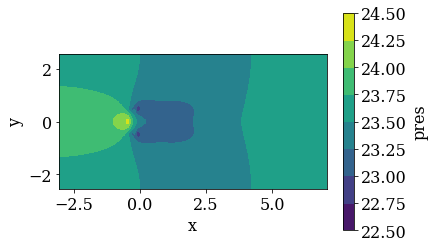

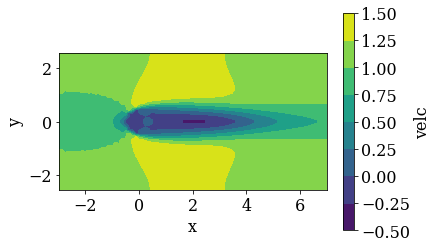

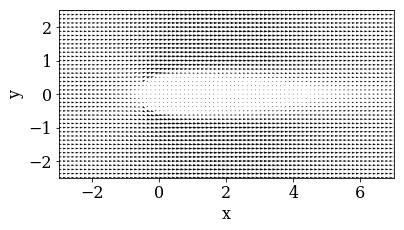

------------ Time = 10.009999999999831 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.217865020451545e-13
Total poisson time : 0.015446901321411133
Total INS time : 0.01830291748046875
Max, Min, U   : 1.4148991605518781, -0.26944295815716435
Max, Min, V   : 1.0368360454564112, -1.036836045456411
Max, Min, P   : 24.7098104070069, 23.067400307786478
Max, Min, DIV : 1.7763568394002505e-15, -1.942890293094024e-15
Qin, Qout     : 5.0, 5.0




In [4]:
imbound.map_to_grid()

while scalars.time <= scalars.tmax:
    
    ins.advance()
    scalars.advance()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        flowx.io.display_stats(scalars)  
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')           

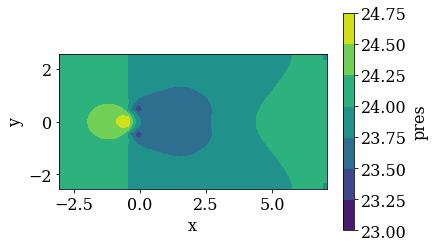

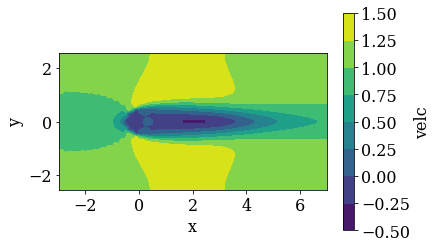

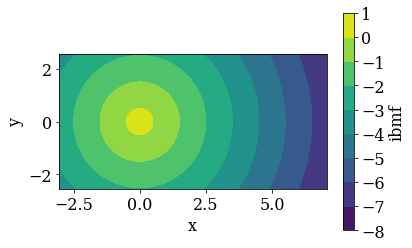

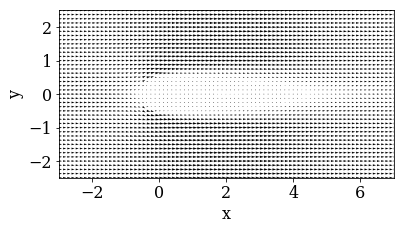

In [5]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridc, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')